## Import Package

In [1]:
# Python import library
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
# Self_define import file
import process_data as pcs


## Process Data

In [2]:
processor = pcs.Processor()
lfhf_list = processor.getLfhf()
sdnn_list = processor.getSdnn()
sd_fq_array = processor.get_sdnn_lfhf_array()
dict_3d = processor.get3d()
matlabEMG = processor.getEMG()

### Reference
- A threshold level for activity was identified for EMG by measuring the standard deviation of the signal during an obvious period of inactivity (usually during early swing phase for this muscle). 
- The threshold level was set at two times this standard deviation. 
- The time of EMG offset was identified as the intersection of the envelope signal with the threshold level. 
- For cases in which there were multiple intersections within a burst, the last intersection was used. 

*Roberts & Gabaldon (2008) Roberts TJ, Gabaldon AM. Interpreting muscle function from EMG: lessons learned from direct measurements of muscle force. Oxford Journals. 2008;48:312–320.*

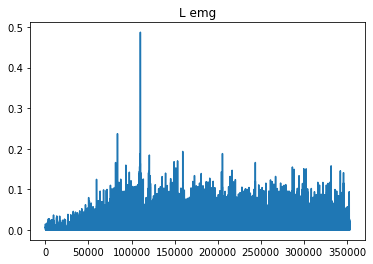

In [7]:
plt.title('Biceps Femoris') 
# plt.plot(2,1,1) 
plt.title('L emg')
plt.plot(matlabEMG['data_new'][:,0])


In [8]:
print(matlabEMG['data_new'][:,0])

[0.00624461 0.00635896 0.00647393 ... 0.00263509 0.00265073 0.00252834]


In [26]:
inactive = matlabEMG['data_new'][:,0][0:10000]
print(inactive)

[0.00624461 0.00635896 0.00647393 ... 0.00353205 0.00478646 0.00468903]


In [35]:
std_V = np.std(inactive)
thold = std_V*5
print(thold)
# thold = 0.2

0.015247794729985557


In [36]:
simpli_list = []
scale = []
for i in range(len(matlabEMG['data_new'][:,0])):
    scale.append(i)
    if matlabEMG['data_new'][:,0][i] > thold:
        simpli_list.append(1)
    else:
        simpli_list.append(0)

(30000.0, 35000.0)

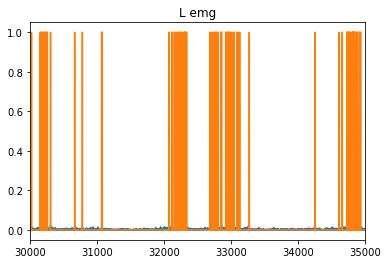

In [41]:
plt.title('Biceps Femoris') 
# plt.plot(2,1,1) 
plt.title('L emg')
plt.plot(matlabEMG['data_new'][:,0])
plt.plot(scale, simpli_list)
plt.xlim(30000,35000)